<a href="https://colab.research.google.com/github/mlundqui/mlundqui.github.io/blob/master/Math142Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


4.114290649694125


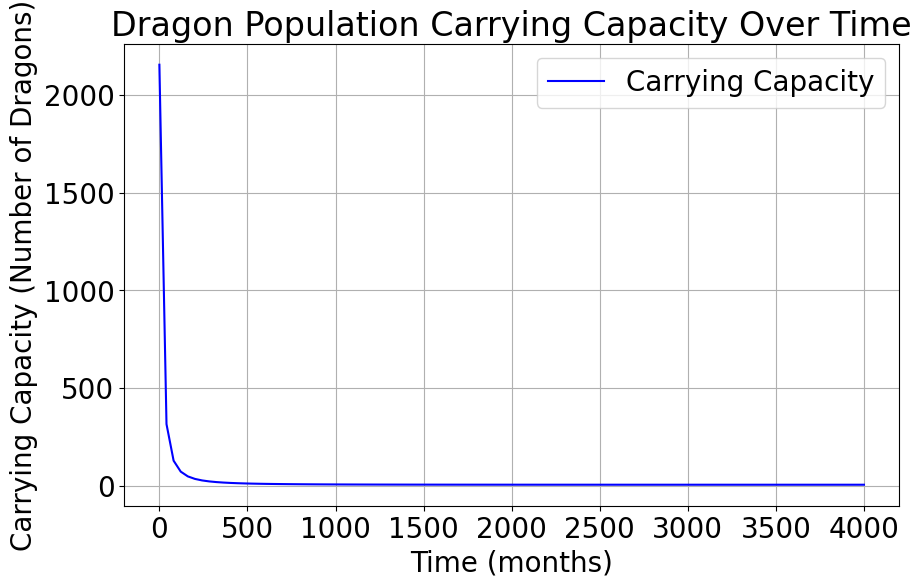

The carrying capacity becomes less than 5 at time: 1252.5252525252524 months.
The minimum carrying capacity is 4.11 dragons.
This occurs at time: 4000.00 months.


In [10]:
def carrying_capacity(M, P, A_max, smoothing_factor=10):

    A_dragon = M**(2/3) * (A_max / P)

    N_land = A_max / A_dragon

    N_prey = P / M

    diff = N_land - N_prey
    N_max = N_prey + (diff / (1 + np.exp(-smoothing_factor * diff)))

    return max(N_max, 0)

def dragon_mass_growth(t, M0, M_inf, k):

    return ((1 - np.exp(-k * t)) * M_inf**(1/3) + np.exp(-k * t) * M0**(1/3))**3


A_max = 1e7
P = 1e4
M0 = 10
M_inf = 1.2e5
k = 0.0019

time = np.linspace(0, 4000, 100)

dragon_masses = dragon_mass_growth(time, M0, M_inf, k)

carrying_caps = [carrying_capacity(M, P, A_max) for M in dragon_masses]

print(min(carrying_caps))

plt.figure(figsize=(10, 6))
plt.plot(time, carrying_caps, label="Carrying Capacity", color='b')
plt.xlabel("Time (months)")
plt.ylabel("Carrying Capacity (Number of Dragons)")
plt.title("Dragon Population Carrying Capacity Over Time")
plt.legend()
plt.grid(True)
plt.show()

carrying_caps = [carrying_capacity(M, P, A_max) for M in dragon_masses]

if any(cap < 5 for cap in carrying_caps):
    time_below_5 = time[np.where(np.array(carrying_caps) < 5)[0][0]]
    print(f"The carrying capacity becomes less than 5 at time: {time_below_5} months.")
else:
    print("The carrying capacity never falls below 5 during the simulation.")


min_carrying_capacity = min(carrying_caps)
min_carrying_capacity_time = time[np.argmin(carrying_caps)]

print(f"The minimum carrying capacity is {min_carrying_capacity:.2f} dragons.")
print(f"This occurs at time: {min_carrying_capacity_time:.2f} months.")

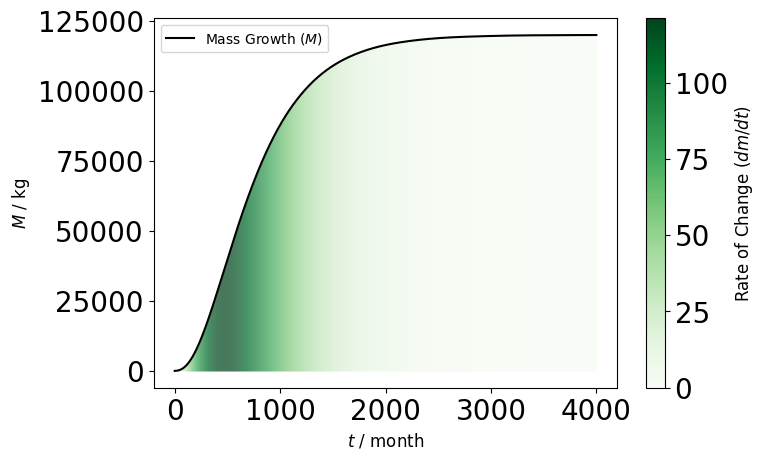

Optimal k: 0.0022699999999999994
Minimum difference: 0.07357408427111523


In [11]:

def weight(t, w, k):
    return 3 * k * w**(2/3) * ((120 * 10**3)**(1/3) - w**(1/3))

max_t = 4000
init_w = 10
k_values = np.arange(0.0001, 0.008, 0.00001)
min_diff = float('inf')
min_diff_k = None

for k in k_values:
    sol = solve_ivp(weight, [0, 12], [init_w], args=(k,), dense_output=True)
    w_end = sol.y[0, -1]
    diff = abs(w_end - 40)
    if diff < min_diff:
        min_diff = diff
        min_diff_k = k

sol = solve_ivp(weight, [0, max_t], [init_w], args=(min_diff_k,), dense_output=True)
t = np.linspace(0, max_t, 1000)
m_t = sol.sol(t)[0]

dm_dt = 3 * min_diff_k * m_t**(2/3) * ((120 * 10**3)**(1/3) - m_t**(1/3))
max_dm_dt = np.max(dm_dt)

fig, ax = plt.subplots(figsize=(8, 5))

norm_dm_dt = dm_dt / max_dm_dt
for i in range(len(t) - 1):
    ax.fill_between(t[i:i+2], 0, m_t[i:i+2], color=plt.cm.Greens(norm_dm_dt[i]), linewidth=0)

ax.plot(t, m_t, color='black', linewidth=1.5, label=r'Mass Growth ($M$)')

sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=max_dm_dt))
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'Rate of Change ($dm/dt$)', fontsize=12)

ax.set_xlabel(r'$t$ / month', fontsize=12)
ax.set_ylabel(r'$M$ / kg', fontsize=12)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(f"Optimal k: {min_diff_k}")
print(f"Minimum difference: {min_diff}")

In [12]:
def complex_model(t, y, a, c, e, r, m, T, M0, M_inf, k, A_max, P_max):

    P = y[0]
    D = y[1]
    seas_drag = r * np.sin(2*np.pi * t/ T)

    M = dragon_mass_growth(t, M0, M_inf, k)

    N_max = carrying_capacity(M, P, A_max)

    logistic_factor = (1 - D / N_max) if D < N_max else 0

    dragon_mortality_due_to_prey = (1 - (P / P_max))

    dDdt = D * ((seas_drag + a * P - m) * logistic_factor - dragon_mortality_due_to_prey)

    dPdt = P * (c - e * D)

    return [dPdt, dDdt]

<ipython-input-12-db85c1e406cb>:11: RuntimeWarning: divide by zero encountered in scalar divide
  logistic_factor = (1 - D / N_max) if D < N_max else 0
<ipython-input-10-a8abc7e991e3>:5: RuntimeWarning: divide by zero encountered in scalar divide
  N_land = A_max / A_dragon
<ipython-input-10-a8abc7e991e3>:9: RuntimeWarning: invalid value encountered in scalar subtract
  diff = N_land - N_prey
<ipython-input-12-db85c1e406cb>:15: RuntimeWarning: invalid value encountered in scalar multiply
  dDdt = D * ((seas_drag + a * P - m) * logistic_factor - dragon_mortality_due_to_prey)
<ipython-input-10-a8abc7e991e3>:10: RuntimeWarning: overflow encountered in exp
  N_max = N_prey + (diff / (1 + np.exp(-smoothing_factor * diff)))


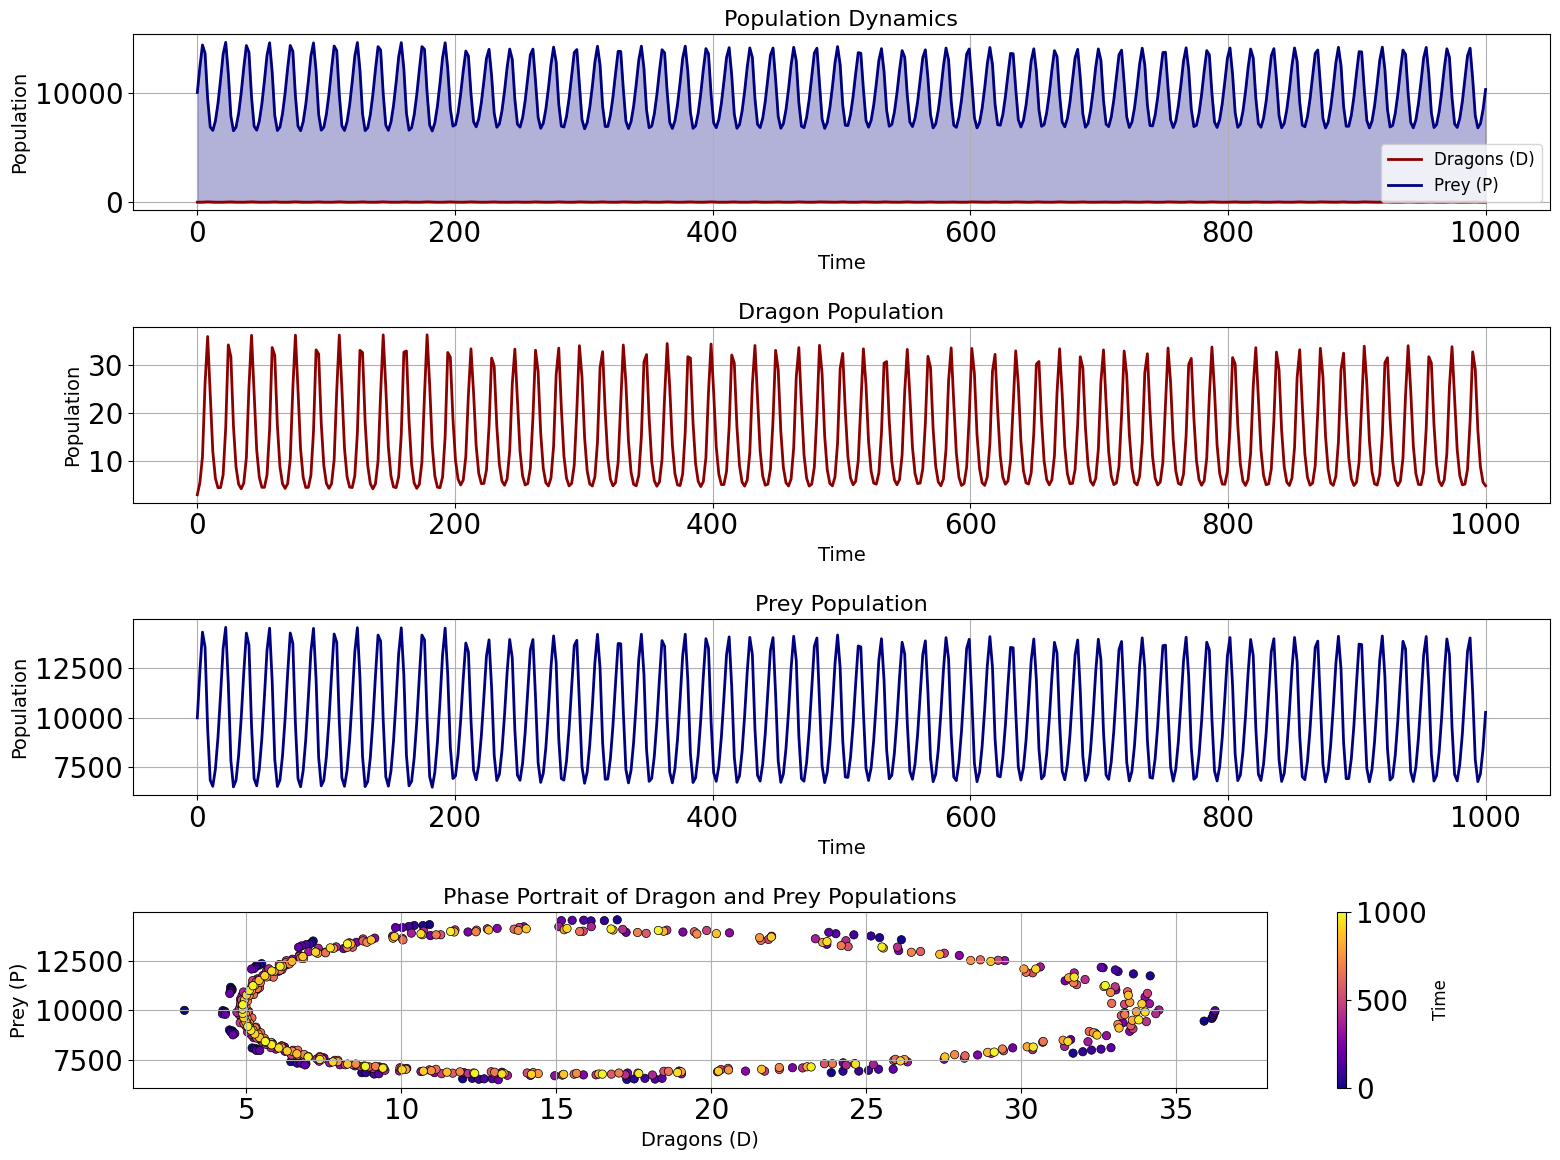

In [13]:

a = 0.02
c = 0.15
e = 0.01
r = 0.15
m = 0.001
M0 = 10
M_inf = 1.2e5
k = 0.0022699
A_max = 1e7
P_max = 1e4
T = 12

t_span = (0, 1000)
t_eval = np.linspace(*t_span, 500)
y0 = [10000, 3]


sol = solve_ivp(
    complex_model, t_span, y0, t_eval=t_eval,
    args=(a, c, e, r, m, T, A_max, M_inf, M0, k, P_max)
)

fig, ax = plt.subplots(4, 1, figsize=(16, 12))
plt.rcParams['font.size'] = 20

dragon_color = sns.color_palette("Reds", as_cmap=True)
prey_color = sns.color_palette("Blues", as_cmap=True)

ax[0].plot(sol.t, sol.y[1], label='Dragons (D)', color='darkred', lw=2)
ax[0].fill_between(sol.t, 0, sol.y[1], color='darkred', alpha=0.3)
ax[0].plot(sol.t, sol.y[0], label='Prey (P)', color='navy', lw=2)
ax[0].fill_between(sol.t, 0, sol.y[0], color='navy', alpha=0.3)
ax[0].set_title('Population Dynamics', fontsize=16)
ax[0].set_xlabel('Time', fontsize=14)
ax[0].set_ylabel('Population', fontsize=14)
ax[0].legend(fontsize=12)
ax[0].grid()

dragon_line_style = {'color': 'darkred', 'lw': 2, 'label': 'Dragons (D)'}
prey_line_style = {'color': 'navy', 'lw': 2, 'label': 'Prey (P)'}

ax[1].plot(sol.t, sol.y[1], **dragon_line_style)
ax[1].set_title('Dragon Population', fontsize=16)
ax[1].set_xlabel('Time', fontsize=14)
ax[1].set_ylabel('Population', fontsize=14)
ax[1].grid()

ax[2].plot(sol.t, sol.y[0], **prey_line_style)
ax[2].set_title('Prey Population', fontsize=16)
ax[2].set_xlabel('Time', fontsize=14)
ax[2].set_ylabel('Population', fontsize=14)
ax[2].grid()

sc = ax[3].scatter(
    sol.y[1], sol.y[0], c=sol.t, cmap="plasma", edgecolor='k', lw=0.5
)
cb = plt.colorbar(sc, ax=ax[3])
cb.set_label('Time', fontsize=12)
ax[3].set_title('Phase Portrait of Dragon and Prey Populations', fontsize=16)
ax[3].set_xlabel('Dragons (D)', fontsize=14)
ax[3].set_ylabel('Prey (P)', fontsize=14)
ax[3].grid()

plt.tight_layout()
plt.show()

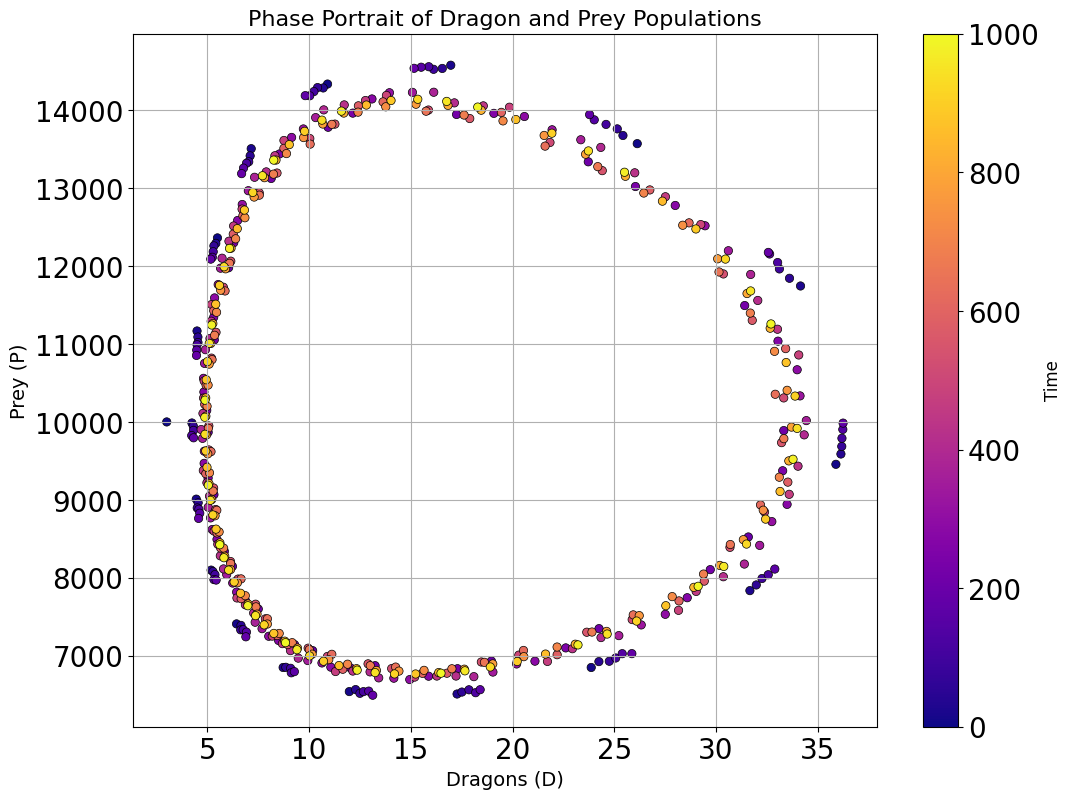

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
plt.rcParams['font.size'] = 20
sc = ax.scatter(
    sol.y[1], sol.y[0], c=sol.t, cmap="plasma", edgecolor='k', lw=0.5
)
cb = plt.colorbar(sc, ax=ax)
cb.set_label('Time', fontsize=12)
ax.set_title('Phase Portrait of Dragon and Prey Populations', fontsize=16)
ax.set_xlabel('Dragons (D)', fontsize=14)
ax.set_ylabel('Prey (P)', fontsize=14)
ax.grid()